In [67]:
import cv2
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import os 
from random import seed, randint
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from albumentations.pytorch import ToTensorV2
import random
%matplotlib inline

In [45]:
color_df = pd.read_csv('./color_augmentation.csv').drop(['Unnamed: 0'], axis=1)
area_df = pd.read_csv('./area_augmentation.csv').drop(['Unnamed: 0'], axis=1)
contrast_df = pd.read_csv('./contrast_augmentation.csv').drop(['Unnamed: 0'], axis=1)

In [49]:
color_lst = color_df.values.tolist()
area_lst = area_df.values.tolist()
contrast_lst = contrast_df.values.tolist()
len(color_lst), len(area_lst), len(contrast_lst)
# color_df

(687, 1372, 838)

In [50]:
df = color_df.merge(area_df, on='img_name', how='outer').merge(contrast_df, on='img_name', how='outer')
df

,img_name,times_aug_color,times_aug_area,times_aug_contrast
0,003418d64812702a483b2605f2d6b334.jpg,1.0,NaN,3.0
1,00ba6e5339894347e74e4c31e17546a9.jpg,1.0,2.0,NaN
2,0347ed48c9125511c2b99dfd1a3ed3f3.jpg,1.0,NaN,NaN
3,051896cc924a37769484fa427c1c3b6b.jpg,1.0,NaN,3.0
4,05261999b826f660dc0ffe08f89ab160.jpg,1.0,NaN,NaN
...,...,...,...,...
2206,fcfe20f08051ed5a97decdff3f78de1a.jpg,NaN,NaN,1.0
2207,feb52287ce39cd6d759f45c38074c8ab.jpg,NaN,NaN,1.0
2208,fee7c149636e16c738bbb2c326189c64.jpg,NaN,NaN,1.0
2209,ff2b1c5388da1343e248824276401439.jpg,NaN,NaN,1.0


In [52]:
only_color = df[df['times_aug_color'].notna() & df['times_aug_area'].isna() & df['times_aug_contrast'].isna()].values.tolist()
only_area = df[df['times_aug_color'].isna() & df['times_aug_area'].notna() & df['times_aug_contrast'].isna()].values.tolist()
only_contrast = df[df['times_aug_color'].isna() & df['times_aug_area'].isna() & df['times_aug_contrast'].notna()].values.tolist()

color_and_area = df[df['times_aug_color'].notna() & df['times_aug_area'].notna() & df['times_aug_contrast'].isna()].values.tolist()
color_and_contrast = df[df['times_aug_color'].notna() & df['times_aug_area'].isna() & df['times_aug_contrast'].notna()].values.tolist()
area_and_contrast = df[df['times_aug_color'].isna() & df['times_aug_area'].notna() & df['times_aug_contrast'].notna()].values.tolist()

all = df[df['times_aug_color'].notna() & df['times_aug_area'].notna() & df['times_aug_contrast'].notna()].values.tolist()
list(map(len, [only_color, only_area, only_contrast, color_and_area, color_and_contrast, area_and_contrast, all ]))

[258, 1028, 324, 87, 257, 172, 85]

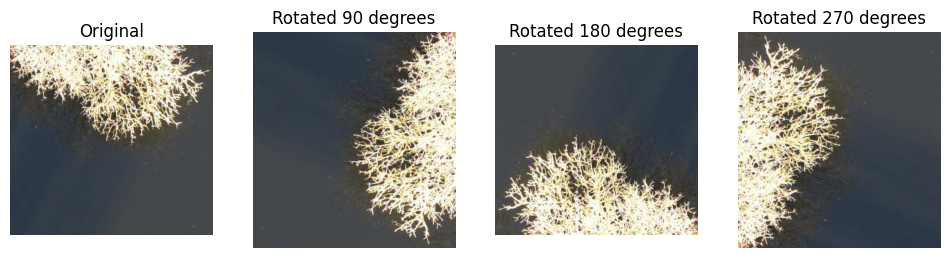

In [63]:

# Load the image using OpenCV
image_path = './data/public/img/train/003418d64812702a483b2605f2d6b334.jpg'
image = cv2.imread(image_path)

# Rotate the image 90 degrees
rotated_image_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Rotate the image 180 degrees
rotated_image_180 = cv2.rotate(image, cv2.ROTATE_180)

# Rotate the image 270 degrees
rotated_image_270 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Convert BGR to RGB for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rotated_image_rgb_90 = cv2.cvtColor(rotated_image_90, cv2.COLOR_BGR2RGB)
rotated_image_rgb_180 = cv2.cvtColor(rotated_image_180, cv2.COLOR_BGR2RGB)
rotated_image_rgb_270 = cv2.cvtColor(rotated_image_270, cv2.COLOR_BGR2RGB)

# Display the images using Matplotlib
fig, axs = plt.subplots(1, 4, figsize=(12, 3))

axs[0].imshow(image_rgb)
axs[0].axis('off')
axs[0].set_title('Original')

axs[1].imshow(rotated_image_rgb_90)
axs[1].axis('off')
axs[1].set_title('Rotated 90 degrees')

axs[2].imshow(rotated_image_rgb_180)
axs[2].axis('off')
axs[2].set_title('Rotated 180 degrees')

axs[3].imshow(rotated_image_rgb_270)
axs[3].axis('off')
axs[3].set_title('Rotated 270 degrees')

plt.show()

In [103]:
demo = only_area[-5:]

In [104]:
IMG_DIR = './data/public/img/train/'
ANN_DIR = './data/public/ann/train/'

In [153]:
for image in only_color:
    img = cv2.imread(IMG_DIR+image[0])
    ann = cv2.imread(ANN_DIR+image[0][:-3]+'png')
    rotate_degree = random.sample([90, 180, 270], k=int(image[1]))
    for d in rotate_degree:
        if d==90:
            rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_90_CLOCKWISE)
        elif d==180:
            rotated_img = cv2.rotate(img, cv2.ROTATE_180)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_180)
        elif d==270:
            rotated_img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_90_COUNTERCLOCKWISE)
        cv2.imwrite(f'./data_after_augmentation/img/{d}_{image[0]}', rotated_img)
        cv2.imwrite(f'./data_after_augmentation/ann/{d}_{image[0][:-3]}png', rotated_ann)
        
###################################################################################################

for image in only_area:
    img = cv2.imread(IMG_DIR+image[0])
    ann = cv2.imread(ANN_DIR+image[0][:-3]+'png')
    rotate_degree = random.sample([90, 180, 270], k=int(image[2]))
    for d in rotate_degree:
        if d==90:
            rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_90_CLOCKWISE)
        elif d==180:
            rotated_img = cv2.rotate(img, cv2.ROTATE_180)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_180)
        elif d==270:
            rotated_img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_90_COUNTERCLOCKWISE)
        cv2.imwrite(f'./data_after_augmentation/img/{d}_{image[0]}', rotated_img)
        cv2.imwrite(f'./data_after_augmentation/ann/{d}_{image[0][:-3]}png', rotated_ann)
        
###################################################################################################

for image in only_contrast:
    img = cv2.imread(IMG_DIR+image[0])
    ann = cv2.imread(ANN_DIR+image[0][:-3]+'png')
    rotate_degree = random.sample([90, 180, 270], k=int(image[3]))
    for d in rotate_degree:
        if d==90:
            rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_90_CLOCKWISE)
        elif d==180:
            rotated_img = cv2.rotate(img, cv2.ROTATE_180)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_180)
        elif d==270:
            rotated_img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_90_COUNTERCLOCKWISE)
        cv2.imwrite(f'./data_after_augmentation/img/{d}_{image[0]}', rotated_img)
        cv2.imwrite(f'./data_after_augmentation/ann/{d}_{image[0][:-3]}png', rotated_ann)


In [155]:
for image in color_and_area:
    img = cv2.imread(IMG_DIR+image[0])
    ann = cv2.imread(ANN_DIR+image[0][:-3]+'png')   
    rotate_degree = random.sample([90, 180, 270], k=int(random.choice([image[1], image[2]])))
    for d in rotate_degree:
        if d==90:
            rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_90_CLOCKWISE)
        elif d==180:
            rotated_img = cv2.rotate(img, cv2.ROTATE_180)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_180)
        elif d==270:
            rotated_img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_90_COUNTERCLOCKWISE)
        cv2.imwrite(f'./data_after_augmentation/img/{d}_{image[0]}', rotated_img)
        cv2.imwrite(f'./data_after_augmentation/ann/{d}_{image[0][:-3]}png', rotated_ann)
        
###################################################################################################

for image in color_and_contrast:
    img = cv2.imread(IMG_DIR+image[0])
    ann = cv2.imread(ANN_DIR+image[0][:-3]+'png')
    rotate_degree = random.sample([90, 180, 270], k=int(random.choice([image[1], image[3]])))
    for d in rotate_degree:
        if d==90:
            rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_90_CLOCKWISE)
        elif d==180:
            rotated_img = cv2.rotate(img, cv2.ROTATE_180)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_180)
        elif d==270:
            rotated_img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_90_COUNTERCLOCKWISE)
        cv2.imwrite(f'./data_after_augmentation/img/{d}_{image[0]}', rotated_img)
        cv2.imwrite(f'./data_after_augmentation/ann/{d}_{image[0][:-3]}png', rotated_ann)
        
###################################################################################################

for image in area_and_contrast:
    img = cv2.imread(IMG_DIR+image[0])
    ann = cv2.imread(ANN_DIR+image[0][:-3]+'png')
    rotate_degree = random.sample([90, 180, 270], k=int(random.choice([image[2], image[3]])))
    for d in rotate_degree:
        if d==90:
            rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_90_CLOCKWISE)
        elif d==180:
            rotated_img = cv2.rotate(img, cv2.ROTATE_180)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_180)
        elif d==270:
            rotated_img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_90_COUNTERCLOCKWISE)
        cv2.imwrite(f'./data_after_augmentation/img/{d}_{image[0]}', rotated_img)
        cv2.imwrite(f'./data_after_augmentation/ann/{d}_{image[0][:-3]}png', rotated_ann)

In [156]:
for image in all:
    img = cv2.imread(IMG_DIR+image[0])
    ann = cv2.imread(ANN_DIR+image[0][:-3]+'png')
    rotate_degree = random.sample([90, 180, 270], k=int(random.choice([image[1],image[2], image[3]])))
    for d in rotate_degree:
        if d==90:
            rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_90_CLOCKWISE)
        elif d==180:
            rotated_img = cv2.rotate(img, cv2.ROTATE_180)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_180)
        elif d==270:
            rotated_img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
            rotated_ann = cv2.rotate(ann, cv2.ROTATE_90_COUNTERCLOCKWISE)
        cv2.imwrite(f'./data_after_augmentation/img/{d}_{image[0]}', rotated_img)
        cv2.imwrite(f'./data_after_augmentation/ann/{d}_{image[0][:-3]}png', rotated_ann)

In [149]:
img = ['afdsf', 1., 2., 3.]
chosen_numbers = int(random.choice([img[1], img[2]]))
print(chosen_numbers)

2


In [143]:
# ann = cv2.imread('data_after_augmentation/ann/90_4a02715d7d73b0bc6b91b2cae88043a0.png')
# plt.imshow(ann)